In [1]:
# Get stock data 
import pandas as pd
from datetime import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import quandl
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

#### set time

In [11]:
start = datetime(2014,1,1)
end = datetime.now()

In [28]:
df = web.DataReader("BABA", "iex", start, end)

5y


In [25]:
df.index

Index(['2014-09-19', '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25',
       '2014-09-26', '2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02',
       ...
       '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14',
       '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21'],
      dtype='object', name='date', length=1010)

#### set index and reset index(means let index as 0....n)

In [27]:
df.reset_index(inplace=True)
df.set_index('open',inplace=True)

#### data visualization

In [30]:
import matplotlib.pyplot as plt
from matplotlib import style

In [31]:
style.use('fivethirtyeight')

#### show close column

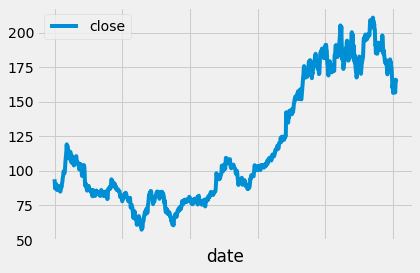

In [34]:
df['close'].plot()
plt.legend()
plt.show()

#### pandas basic 

In [36]:
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

In [37]:
df = pd.DataFrame(web_stats)

#### set index

In [43]:
df.set_index('Day',inplace=True)

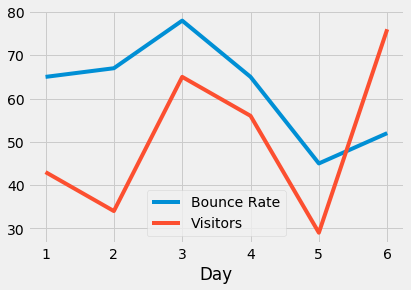

In [47]:
df.plot()
plt.show()

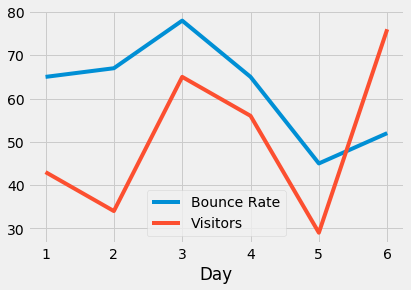

In [48]:
df.plot()
plt.legend()
plt.show()

#### load csv data

In [50]:
df = pd.read_csv('/Users/tianxiang/Downloads/SP500 2000.csv')

In [54]:
df.set_index('Date',inplace=True)

#### header and set header and when load data set index to one column

In [57]:
df = pd.read_csv('/Users/tianxiang/Downloads/SP500 2000.csv',index_col=0)

In [58]:
df.head()

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Return,Direction
Date,,,,,,,,
1/11/2000,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


#### to html

In [62]:
df.to_html('SP500.html')

#### reset header

In [64]:
df.head()

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Volume,Return,Direction
Date,,,,,,,,
1/11/2000,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


In [69]:
df.rename(columns={'Lag 1':'log'},inplace=True)

#### set columns name when load no name data

In [130]:
df.to_csv('test.csv',header=False)
df1 = pd.read_csv('test.csv',names =['Date','Dat1e','Dat2e','Da3te','Da4te','Dat5e','Dat6e','D9ate','Da0te',])

In [131]:
df1.head()

,Date,Dat1e,Dat2e,Da3te,Da4te,Dat5e,Dat6e,D9ate,Da0te
0,1/11/2000,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1,1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
2,1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
3,1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
4,1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


In [128]:
df1.set_index('Date',inplace=True)

In [127]:
df1 = df1.iloc[:,:2]

#### change exact index and column names

In [179]:
df1 = df1.rename(str.lower,axis=1)
df1 = df1.rename({'1/11/2000':1}, axis=0)
df1.head()

,dat1e,dat2e,da3te,da4te,dat5e,dat6e,d9ate,da0te
Date,,,,,,,,
1,0.00483,0.01161,0.00041,0.00083,-0.01698,1014000000,-0.005710,DOWN
1/12/2000,-0.00571,0.00483,0.01161,0.00041,0.00083,974600000,-0.001909,DOWN
1/13/2000,-0.00191,-0.00571,0.00483,0.01161,0.00041,1030400000,0.005253,UP
1/14/2000,0.00525,-0.00191,-0.00571,0.00483,0.01161,1085900000,0.004610,UP
1/18/2000,0.00461,0.00525,-0.00191,-0.00571,0.00483,1056700000,-0.002977,DOWN


In [ ]:
df1 = df1.reindex_axis

## several major ways to combine data
### append and concat add rows in dataframe if they have same columns name 
### series- whenever we say something like df['column'], the return is a series.

In [199]:
df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rat':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rat':[2, 4, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [190]:
df1

,HPI,Int_rat,US_GDP_Thousands
2001,80,2,50
2002,85,3,55
2003,88,2,65
2004,85,2,55


In [202]:
concat = pd.concat([df1,df2],sort = False)
concat

,HPI,Int_rat,US_GDP_Thousands
2001,80,2,50
2002,85,3,55
2003,88,2,65
2004,85,2,55
2005,80,2,50
2006,85,4,55
2007,88,2,65
2008,85,2,55


In [195]:
concat.dropna()

,HPI,Int_rat,US_GDP_Thousands,Int_rate


In [200]:
df1.append(df2)

,HPI,Int_rat,US_GDP_Thousands
2001,80,2,50
2002,85,3,55
2003,88,2,65
2004,85,2,55
2005,80,2,50
2006,85,4,55
2007,88,2,65
2008,85,2,55


## joining and merging dataframes 

In [239]:
df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_ate':[2, 4, 2, 2],
                    'US_DP_Thousands':[50, 55, 65, 5]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [205]:
print(pd.merge(df1,df3, on='HPI'))

   HPI  Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
0   80         2                50            50             7
1   85         3                55            52             8
2   85         3                55            53             6
3   85         2                55            52             8
4   85         2                55            53             6
5   88         2                65            50             9


In [235]:
print(pd.merge(df1,df2, on = ['HPI'],how = 'outer'))
# outer inner left right

     Int_rate_x  US_GDP_Thousands_x  Int_rate_y  US_GDP_Thousands_y
HPI                                                                
80            2                  50           2                  50
85            3                  55           4                  55
85            3                  55           2                   5
85            2                  55           4                  55
85            2                  55           2                   5
88            2                  65           2                  65


##  Now, what if HPI was already the index? Or, in our case, We'll probably be joining on the dates, but the dates might be the index. In this case, we'd probably use join.

In [243]:
df1.set_index('HPI', inplace=True)
df2.set_index('HPI', inplace=True)
df3.set_index('HPI', inplace=True)

##  some difference bewteen join and mergy, if there is replicated columns in join, it needed to explicitly lsuffix='_left', rsuffix='_right'

In [246]:
df1.join(df2,how = 'left',lsuffix='_left', rsuffix='_right')

,Int_rate,US_GDP_Thousands,Int_ate,US_DP_Thousands
HPI,,,,
80,2,50,2,50
85,3,55,4,55
85,3,55,2,5
85,2,55,4,55
85,2,55,2,5
88,2,65,2,65


In [238]:
df1.join(df3)

,Int_rate,US_GDP_Thousands,Low_tier_HPI,Unemployment
HPI,,,,
80,2,50,50,7
85,3,55,52,8
85,3,55,53,6
85,2,55,52,8
85,2,55,53,6
88,2,65,50,9


## Building dataset

In [16]:
import quandl

In [44]:
df = quandl.get(["FMAC/HPI_TX","FMAC/HPI_IL"])

In [46]:
df.columns = ['TX','IL']

In [47]:
df

,TX,IL
Date,,
1975-01-31,32.602350,25.670410
1975-02-28,32.944116,25.766823
1975-03-31,33.542975,25.969181
1975-04-30,34.402826,26.232112
1975-05-31,34.649755,26.396115
1975-06-30,34.214012,26.487959
1975-07-31,33.926084,26.619777
1975-08-31,33.892530,26.745430
1975-09-30,33.975850,26.855966


### pd.read_html you will get a list of dataframe

In [5]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
wiki = pd.read_html('https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)')

In [6]:
main_df = pd.DataFrame()
for abbv in fiddy_states[0][1][1:]:
    query = "FMAC/HPI_" + str(abbv)
    df = quandl.get(query,api_key='VU2KfDTTpaSJXc8e84iv')
    df.columns = [str(abbv)]
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df)


In [7]:
main_df.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.695975,34.371830,28.937735,36.738861,15.722312,19.603977,24.369431,27.264842,30.997043,30.720917,...,37.722210,32.179633,32.602350,24.698474,26.637620,27.912640,17.484315,41.002072,28.096764,31.668794
1975-02-28,35.896770,34.880945,29.463708,37.098962,15.775202,19.837138,24.908036,27.250734,32.229049,30.450593,...,37.319634,32.218599,32.944116,25.060977,26.956271,28.205810,17.571053,42.040473,28.486170,32.161920
1975-03-31,36.133518,35.402217,29.959514,37.416398,15.964942,20.073483,25.313556,27.268478,34.027506,30.338265,...,36.908861,32.296539,33.542975,25.381341,27.264731,28.420407,17.689717,43.122486,28.860737,32.680525
1975-04-30,36.425723,35.944703,30.345148,37.677813,16.275547,20.301864,25.541141,27.362673,36.218077,30.401314,...,36.498238,32.416385,34.402826,25.627200,27.546568,28.578762,17.818792,44.239196,29.185048,33.210124
1975-05-31,36.695708,36.535272,30.546449,37.921099,16.533017,20.495075,25.614056,27.561893,36.437855,30.511355,...,36.121328,32.563209,34.649755,25.782334,27.794738,28.717611,17.933277,45.363222,29.443523,33.714128


###  Pickle to store not dataframe data

In [8]:
pickle_out = open('fiddy_states.pickle','wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()   


In [9]:
HPI_data = pd.read_pickle('fiddy_states.pickle')

In [27]:
pickle_in = open('fiddy_states.pickle','rb')
HPI_data = pickle.load(pickle_in)


            Value_left  Value_right  Value_left  Value_right  Value_left  \
Date                                                                       
1975-01-31   35.695975    34.371830   28.937735    36.738861   15.722312   
1975-02-28   35.896770    34.880945   29.463708    37.098962   15.775202   
1975-03-31   36.133518    35.402217   29.959514    37.416398   15.964942   
1975-04-30   36.425723    35.944703   30.345148    37.677813   16.275547   
1975-05-31   36.695708    36.535272   30.546449    37.921099   16.533017   
1975-06-30   36.823713    37.165797   30.496614    38.159640   16.646799   
1975-07-31   36.747060    37.795450   30.173822    38.351084   16.768340   
1975-08-31   36.511773    38.369702   29.662525    38.450073   16.989530   
1975-09-30   36.255136    38.870586   29.128419    38.428010   17.230749   
1975-10-31   36.139294    39.326955   28.828753    38.355341   17.447896   
1975-11-30   36.247464    39.737259   28.941164    38.377787   17.596355   
1975-12-31  

### pandas pickle

In [2]:
# main_df.to_pickle('pandas_pickle')
HPI_data = pd.read_pickle('pandas_pickle')

In [10]:
HPI_data.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.695975,34.371830,28.937735,36.738861,15.722312,19.603977,24.369431,27.264842,30.997043,30.720917,...,37.722210,32.179633,32.602350,24.698474,26.637620,27.912640,17.484315,41.002072,28.096764,31.668794
1975-02-28,35.896770,34.880945,29.463708,37.098962,15.775202,19.837138,24.908036,27.250734,32.229049,30.450593,...,37.319634,32.218599,32.944116,25.060977,26.956271,28.205810,17.571053,42.040473,28.486170,32.161920
1975-03-31,36.133518,35.402217,29.959514,37.416398,15.964942,20.073483,25.313556,27.268478,34.027506,30.338265,...,36.908861,32.296539,33.542975,25.381341,27.264731,28.420407,17.689717,43.122486,28.860737,32.680525
1975-04-30,36.425723,35.944703,30.345148,37.677813,16.275547,20.301864,25.541141,27.362673,36.218077,30.401314,...,36.498238,32.416385,34.402826,25.627200,27.546568,28.578762,17.818792,44.239196,29.185048,33.210124
1975-05-31,36.695708,36.535272,30.546449,37.921099,16.533017,20.495075,25.614056,27.561893,36.437855,30.511355,...,36.121328,32.563209,34.649755,25.782334,27.794738,28.717611,17.933277,45.363222,29.443523,33.714128


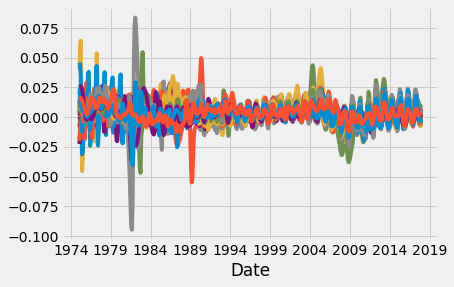

In [60]:
HPI_data.pct_change().plot()
plt.legend().remove()
plt.show()

### resample , and label in plt.plot 

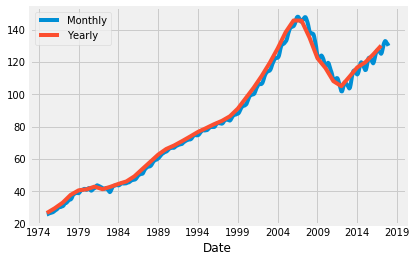

In [16]:
HPI_data['IL'].plot(label = 'Monthly')
yearly = HPI_data['IL'].resample('A').mean()
yearly.plot(label='Yearly')
plt.legend()
plt.show()

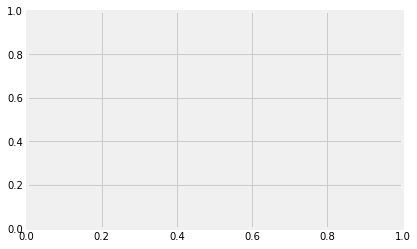

In [18]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))

HPI_data['TX1yr'] = HPI_data['TX'].resample('A').mean()

 #### find missing data， dropna

In [19]:
HPI_data.dropna(inplace=True)
HPI_data.dropna(how='all',inplace=True) # means the all row needs to be na

Date
1975-01-31   NaN
1975-02-28   NaN
1975-03-31   NaN
1975-04-30   NaN
1975-05-31   NaN
Name: TX1yr, dtype: float64

###  fillna

HPI_data.fillna(method='bfill',inplace=True)

###  check the number of null in DataFrame

In [23]:
print(HPI_data.isnull().values)

[[False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]
 ...
 [False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False False]]


In [26]:
HPI_data['TX1yr'].head()

Date
1975-01-31    33.919414
1975-02-28    33.919414
1975-03-31    33.919414
1975-04-30    33.919414
1975-05-31    33.919414
Name: TX1yr, dtype: float64

#### rolling and subplot

In [28]:
HPI_data['TX12MA'] = HPI_data['TX'].rolling(12).mean()

In [30]:
HPI_data['TXCorrIL'] = HPI_data['TX'].rolling(12).corr(HPI_data['IL'])

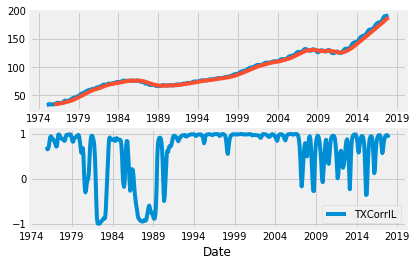

In [31]:
plt.figure()
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))
HPI_data['TX'].plot(ax = ax1)
HPI_data['TX12MA'].plot(ax = ax1)
HPI_data['TXCorrIL'].plot(ax = ax2)
plt.plot()
plt.legend()
plt.show()

In [32]:
12/10

1.2

In [33]:
10/12

0.8333333333333334

In [34]:
type(HPI_data['IL'])

pandas.core.series.Series

In [35]:
HPI_data.describe()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,UT,VT,VA,WA,WV,WI,WY,TX1yr,TX12MA,TXCorrIL
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,505.000000,505.000000
mean,88.040519,102.875146,94.970954,91.188402,98.671997,80.396637,94.066850,96.341865,100.434160,81.165505,...,87.916219,98.709162,101.341621,91.453362,94.177539,83.990685,102.221214,94.186471,93.799809,0.611576
std,30.895907,42.747525,46.529913,30.793567,59.588989,42.734426,41.049448,46.746919,51.468212,31.435406,...,43.309020,48.512703,52.213532,52.939313,31.453524,35.667761,49.971635,36.976253,35.449518,0.560624
min,35.695975,34.371830,28.828753,36.738861,15.722312,19.603977,24.369431,27.250734,30.997043,29.492202,...,24.698474,26.637620,27.912640,17.484315,41.002072,28.096764,31.668794,33.919414,33.919414,-0.998078
25%,60.916431,71.475014,62.734450,67.407430,47.367816,44.712150,60.955424,53.015365,61.731919,56.522367,...,49.522837,53.397704,55.762064,40.996435,65.945999,47.869298,62.073576,69.103741,69.214143,0.531924
50%,87.341799,88.013799,80.296267,89.043207,77.996474,70.600083,91.164669,83.426668,80.156046,77.610004,...,89.368114,83.988848,81.971000,79.396954,90.354033,82.892474,86.606176,80.045480,80.045480,0.888300
75%,116.723347,153.694925,122.786745,124.525276,138.804713,116.201648,132.079228,144.967509,132.580171,108.470575,...,124.225501,157.371924,157.806065,134.275215,129.636726,119.385653,161.936971,125.911305,125.984366,0.972274
max,138.465286,180.863076,205.359961,143.883305,224.416791,191.251430,165.816399,177.933370,224.523335,143.590543,...,187.437632,175.997419,192.411644,220.553276,147.406003,141.929765,193.557479,188.030810,188.030810,0.997858


### delete erronous data

In [36]:
bridge_height = {'meters':[10.26, 10.31, 10.27, 10.22, 10.23, 6212.42, 10.28, 10.25, 10.31]}
df = pd.DataFrame(bridge_height)

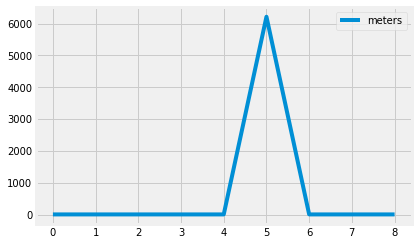

In [37]:
df.plot()
plt.show()

In [40]:
df['Std'] = df.rolling(2).std()

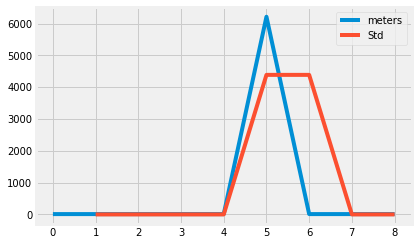

In [41]:
df.plot()
plt.show()

In [42]:
df_des = df.describe()

In [43]:
df_des

,meters,Std
count,9.000000,8.000000
mean,699.394444,1096.419446
std,2067.384584,2030.121949
min,10.220000,0.007071
25%,10.250000,0.026516
50%,10.270000,0.035355
75%,10.310000,1096.425633
max,6212.420000,4385.610607


In [46]:
df_des['meters']['std']

2067.3845835687607

In [48]:
df[df['Std']<df_des['meters']['std']]

,meters,Std
1,10.31,0.035355
2,10.27,0.028284
3,10.22,0.035355
4,10.23,0.007071
7,10.25,0.021213
8,10.31,0.042426


In [49]:
df

,meters,Std
0,10.26,NaN
1,10.31,0.035355
2,10.27,0.028284
3,10.22,0.035355
4,10.23,0.007071
5,6212.42,4385.610607
6,10.28,4385.575252
7,10.25,0.021213
8,10.31,0.042426
